
# **Battery Temperature Prediction using Machine Learning**
### **Objective:**
This notebook demonstrates two approaches to predict the **internal battery temperature** based on **voltage, current, and ambient temperature** using:
1. **Linear Regression** (Simple and interpretable model)
2. **Neural Network** (More flexible, can capture complex relationships)

Both models are trained and evaluated, and their performance is compared using metrics like **Mean Squared Error (MSE)** and **R² Score**.

### **Dataset Structure:**
The dataset consists of the following columns:
- `Voltage_measured (Volts)` - Measured voltage of the battery
- `Current_measured (Amps)` - Measured current of the battery
- `Temperature_measured (C)` - Internal battery temperature (Target variable)
- `Time (secs)` - Timestamp (not used in model)
- `Source_File` - Source file name (not used in model)
- `Ambient Temperature` - Ambient temperature near the battery
- `Delta_Temperature` - Difference between internal and ambient temperature
- `State` - Charge/Discharge state (not used in model)
- `Cycle_number` - Cycle number (not used in model)

---
### **Let's get started!**


## **Step 1: Load and Explore the Dataset**

In [1]:

import pandas as pd


file_path = "data.csv"
df = pd.read_csv(file_path)
df.head()


,Voltage_measured (Volts),Current_measured (Amps),Temperature_measured (C),Time (secs),Source_File,Ambient Temperature,Delta_Temperature,state,cycle_number,Unnamed: 9
0,3.873017,-0.001201,24.655358,0.000,Cycle_1_charge.csv,24,0.655358,charge,1,NaN
1,3.479394,-4.030268,24.666480,2.532,Cycle_1_charge.csv,24,0.666480,charge,1,NaN
2,4.000588,1.512731,24.675394,5.500,Cycle_1_charge.csv,24,0.675394,charge,1,NaN
3,4.012395,1.509063,24.693865,8.344,Cycle_1_charge.csv,24,0.693865,charge,1,NaN
4,4.019708,1.511318,24.705069,11.125,Cycle_1_charge.csv,24,0.705069,charge,1,NaN



## **Step 2: Data Preprocessing**
We will:
- Select relevant columns: `Voltage_measured (Volts)`, `Current_measured (Amps)`, `Ambient Temperature`, `Temperature_measured (C)`.
- Split data into **training (80%)** and **testing (20%)** sets.
- Normalize input features (important for neural networks).


In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


features = ["Voltage_measured (Volts)", "Current_measured (Amps)", "Ambient Temperature"]
target = "Temperature_measured (C)"

X = df[features].values
y = df[target].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Step 3: Train a Linear Regression Model**

In [3]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)


mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lin:.4f}")
print(f"R² Score: {r2_lin:.4f}")


Linear Regression Results:
Mean Squared Error (MSE): 0.3693
R² Score: 0.6186


## **Step 4: Train a Neural Network Model**

In [4]:

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test_scaled, y_test))


y_pred_nn = model.predict(X_test_scaled).flatten()

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)


print("Neural Network Results:")
print(f"Mean Squared Error (MSE): {mse_nn:.4f}")
print(f"R² Score: {r2_nn:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 636.1435 - val_loss: 620.1511
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 618.1552 - val_loss: 601.5516
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 600.6365 - val_loss: 575.9880
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 571.8172 - val_loss: 535.8058
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 521.4078 - val_loss: 477.0568
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 459.0802 - val_loss: 399.0696
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 378.1662 - val_loss: 300.0199
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 268.8043 - val_loss: 200.1792
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.5177 - val_loss: 112.9539
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.0998 - val_loss: 51.7367
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.1254 - val_loss: 17.9153
Epoch 12/100
40/40 ━━━━

## **Step 5: Compare Both Models**

               Model       MSE  R² Score
0  Linear Regression  0.369266  0.618587
1     Neural Network  0.100056  0.896653


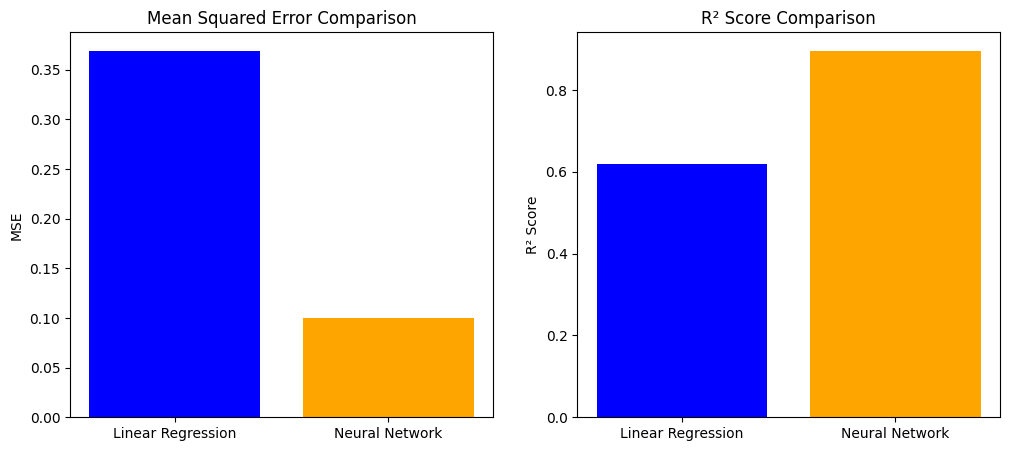

In [5]:

import matplotlib.pyplot as plt
import pandas as pd


results = pd.DataFrame({
    "Model": ["Linear Regression", "Neural Network"],
    "MSE": [mse_lin, mse_nn],
    "R² Score": [r2_lin, r2_nn]
})


print(results)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))


ax[0].bar(results["Model"], results["MSE"], color=['blue', 'orange'])
ax[0].set_title("Mean Squared Error Comparison")
ax[0].set_ylabel("MSE")


ax[1].bar(results["Model"], results["R² Score"], color=['blue', 'orange'])
ax[1].set_title("R² Score Comparison")
ax[1].set_ylabel("R² Score")

plt.show()


1️⃣ Exporting Linear Regression Model (JSON Format)

In [6]:
import json

# Save linear model coefficients for Arduino
lin_model_data = {
    "coefficients": lin_reg.coef_.tolist(),
    "intercept": lin_reg.intercept_
}

# Save scaler parameters (Arduino might need them for normalization)
scaler_params = {
    "mean": scaler.mean_.tolist(),
    "scale": scaler.scale_.tolist()
}

# Save as JSON for easy use in Arduino
with open("lin_model.json", "w") as f:
    json.dump(lin_model_data, f)

with open("scaler_params.json", "w") as f:
    json.dump(scaler_params, f)

print("Linear Regression model parameters saved!")


Linear Regression model parameters saved!


In [7]:
# Extract model weights and biases
weights = model.get_weights()

# Save them into a dictionary
model_weights = {
    "W1": weights[0].tolist(),
    "b1": weights[1].tolist(),
    "W2": weights[2].tolist(),
    "b2": weights[3].tolist(),
    "W3": weights[4].tolist(),
    "b3": weights[5].tolist()
}

# Extract scaler parameters
scaler_params = {
    "mean": scaler.mean_.tolist(),
    "std": scaler.scale_.tolist()
}

import json
with open("model_weights.json", "w") as f:
    json.dump(model_weights, f)

with open("scaler_params.json", "w") as f:
    json.dump(scaler_params, f)

print("Weights and scaler parameters saved!")


Weights and scaler parameters saved!



## **Step 6: Conclusion**
- **Linear Regression** is simpler and interpretable but might not capture complex relationships.
- **Neural Networks** may achieve better accuracy, but they require more computational power.

**Next Steps:** If the dataset is **linear**, Linear Regression should be preferred for efficiency. If non-linearity is present, the Neural Network approach is recommended.
